In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#importing manager csv
female_boss = pd.read_csv('Data/participation_in_ownership.csv')
female_boss.head()
#removing additional years
female_boss_2019=female_boss[["new_code", "year_2019"]]
female_boss_2019.head()
#renaming 2019

female_boss_2019_final=female_boss_2019.rename(columns = {
    "year_2019" :"boss"
})
female_boss_2019_final.head()

,new_code,boss
0,AW,0.0
1,AF,0.0
2,AO,0.0
3,AL,20.7
4,AD,0.0


In [2]:
#importing parliament
female_parliament = pd.read_csv('Data/parliament_seats.csv')
female_parliament.head()
#reducing columns
female_parliament_2019=female_parliament[["new_code", "year_2019"]]
female_parliament_2019.head()
#renaming 2019
female_parliament_2019_final=female_parliament_2019.rename(columns = {
    "year_2019" :"parliament"
})
female_parliament_2019_final.head()

,new_code,parliament
0,AL,29.508197
1,DZ,25.757576
2,AD,46.428571
3,AO,30.000000
4,AG,11.111111


In [3]:
boss_regression=pd.merge(female_parliament_2019_final, female_boss_2019_final, how='inner', on=["new_code", "new_code"])

In [5]:

boss_regression_final=boss_regression[(boss_regression["boss"]>0)]
boss_regression_final

,new_code,parliament,boss
0,AL,29.508197,20.7
8,AZ,16.806723,15.3
18,BG,25.833333,41.7
27,HR,20.529801,31.7
29,CY,17.857143,45.1
30,CZ,22.500000,29.9
38,EE,29.702970,35.5
42,GE,14.765101,22.4
50,HU,12.562814,51.9
57,IT,35.714286,24.0


In [6]:
X = boss_regression_final[['parliament']]
y = boss_regression_final["boss"].values.reshape(-1, 1)
print(X.shape, y.shape)

(29, 1) (29, 1)


In [7]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [9]:
# from sklearn.preprocessing import StandardScaler
# ### BEGIN SOLUTION
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [10]:
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

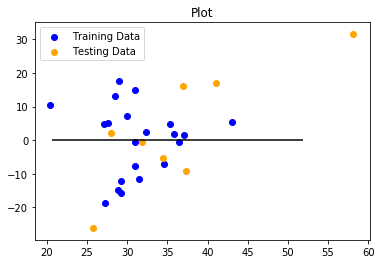

In [10]:
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Plot")
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 179.434515359419, R2: -0.03836423109620335


In [16]:
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.1997718089543792, R2: -0.02275593332179149


In [17]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.1959798149742595, R2: -0.019523415010106904


In [18]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.198059587925309, R2: -0.02129633558531374
